In [1]:
from acquire_msc import get_all_readme_files_and_languages
from acquire_msc import get_alt
from prepare_readme_files import prepare_repo_html_data
from prepare_readme_files import basic_clean

import re
import unicodedata
import pandas as pd
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind as ttest
from wordcloud import WordCloud
from afinn import Afinn

In [2]:
url_list = ['microsoft/Terminal', 'jackfrued/Python-100-Days', 
    'kkuchta/css-only-chat', 'microsoft/PowerToys', 'jolaleye/cssfx', 
    'MisterBooo/LeetCodeAnimation', 'flutter/flutter_web', 
    'TheAlgorithms/Python', 'hiroppy/fusuma', 'CyC2018/CS-Notes', 
    'jaywcjlove/linux-command', 'flutter/flutter', '996icu/996.ICU', 
    'STVIR/pysot', 'minamarkham/formation', 'azl397985856/leetcode', 
    'qianguyihao/Web', 'react-native-windows', 'sql-machine-learning/sqlflow', 
    'sabakkps/backslide', 'dgryski/go-perfbook', 'Snailclimb/JavaGuide', 
    'microsoft/vscode', 'markphelps/flipt', 'teoga/awesome-product-design',
    'dianping/cat','catchorg/Catch2', 'nyaadevs/nyaa', 'jingweno/ccat', 
    'AlexiaJM/Deep-learning-with-cats', 'sharkdp/bat', 'CleverRaven/Cataclysm-DDA', 
    'typelevel/cats', 'catboost/catboost', 'catarse/catarse', 'websockets/wscat' ,
    'udacity/ud989-cat-clicker-premium-vanilla' ,'enigmampc/catalyst' ,
    'catapult-project/catapult','cesarferreira/CatKit', 'Rogero0o/CatLoadingView', 
    'CellularPrivacy/Android-IMSI-Catcher-Detector','ZacSweers/CatchUp', 'awgn/cat', 
    'mattsears/nyan-cat-formatter', 'rancher/community-catalog', 'Oros42/IMSI-catcher',
    'Catrobat/Catroid', 'junyanz/CatPapers', 'kubernetes-incubator/service-catalog',
    'rancher/cattle', 'nolanlawson/Catlog', 'Lunat1q/Catchem-PoGo',
    'interactivethings/catalog', 'windiest/Front-end-tutorial','TeMPOraL/nyan-mode',
    'x0rz/phishing_catcher', 'scikit-learn-contrib/categorical-encoding',
    'Mr-Un1k0d3r/DKMC', 'ros/catkin', 'Catel/Catel', 'typelevel/cats-effect',
    'typelevel/cats-mtl', 'skorokithakis/catt', 'PetoiCamp/OpenCat', 'ring0lab/catphish',
    'aleju/cat-generator', 'youzan/bugCatcher', 'mbcharbonneau/UIImage-Categories',
    'maxogden/javascript-for-cats', 'underscoreio/scala-with-cats','notwaldorf/cat-dns',
    'unidal/cat2', 'Externalizable/bongo.cat', 'rancher/rancher-catalog',
    'joaotavora/sly', 'developit/snarkdown', 'eleybourn/Book-Catalogue',
    'bendytree/Objective-C-RegEx-Categories','travisbrown/iteratee',
    'tinrab/meower','funcool/cats','SophieDeBenedetto/catbook-redux', 'easychen/catgate',
    'ypwhs/dogs_vs_cats', 'notwaldorf/caturday-post', 'catalyst-team/catalyst',
    'OpenExoplanetCatalogue/open_exoplanet_catalogue', 'jbaron/cats', 'typelevel/mouse',
    'callowayproject/django-categories', 'hapijs/catbox', 'Whales/Cataclysm',
    'lunaryorn/mdcat', 'sindresorhus/cat-names', 'keefo/CATweaker',
    'honcheng/CATransform3D-Test', 'stfalcon-studio/SmsVerifyCatcher',
    'typelevel/kittens', 'jerrykrinock/CategoriesObjC', 'cemolcay/CategorySliderView',
    'X-Wei/flutter_catalog', 'CatLib/CatLib', 'calvinmetcalf/catiline',
    'konifar/material-cat', 'letiantian/another-tutorial-about-java-web',
    'tpolecat/cats-infographic', 'catberry/catberry', 'Gibbsdavidl/CatterPlots',
    'Maescool/Catacomb-Snatch', 'secabstraction/PowerCat',
    'perl-catalyst/catalyst-runtime', 'simoninithomas/CatDCGAN', 'lexiross/fattest-cat',
    'CatacombGames/Catacomb3D', 'LiskArchive/lisk-commander',
    'rancher/catalog-dockerfiles', 'opencats/OpenCATS', 'cadejscroggins/catz',
    'atnos-org/eff', 'whatthejeff/nyancat-phpunit-resultprinter', 'posva/catimg']

afinn = Afinn()

Collect the languages and readme files listed for each repo

In [3]:
'''need to collect the languages before I have any extra stopwords...'''
extra_words = []
exclude_words = []

articles = get_alt(url_list)

transformed_data, df = prepare_repo_html_data(articles, extra_words, exclude_words)

Create a list of languages that are "cleaned" (lower case with no symbols) so that we can remove them from the readme texts.

In [4]:
clean_langs = []
for i in range(df.shape[0]):
    next_lang = transformed_data[i]['language'].lower()
    next_lang = re.sub(r'[^\w\s]', ' ', next_lang).strip()
    if next_lang not in clean_langs:
        clean_langs.append(next_lang)

In [5]:
clean_langs 

['c',
 'html',
 'ruby',
 'vue',
 'dart',
 'python',
 'css',
 'java',
 'rust',
 'go',
 'typescript',
 'scala',
 'javascript',
 'kotlin',
 'smarty',
 'lua',
 'objective c',
 'tex',
 'common lisp',
 'clojure',
 'perl',
 'jupyter notebook',
 'shell',
 'php']

Remove languages from the readme files with another call to prepare_repo_html.

In [6]:
extra_words=clean_langs
transformed_data, df = prepare_repo_html_data(articles, extra_words, exclude_words)

We now have a clean dataframe:

In [7]:
df # dataframe

,clean,language,original,title
0,welcome repository contains source code window...,C++,Welcome! This repository contains the source c...,microsoft/Terminal
1,100 devops r matlab r lisp 20185 make english ...,HTML,Python - 100天从新手到大师\n\n作者：骆昊\n\nPython应用领域和就业形...,jackfrued/Python-100-Days
2,chat truly monstrous async web chat using js w...,Ruby,CSS-Only Chat\nA truly monstrous async web cha...,kkuchta/css-only-chat
3,chat truly monstrous async web chat using js w...,Ruby,CSS-Only Chat\nA truly monstrous async web cha...,microsoft/PowerToys
4,beautifully simple click copy effects https cs...,Vue,Beautifully simple click-to-copy CSS effects\n...,jolaleye/cssfx
5,beautifully simple click copy effects https cs...,Vue,Beautifully simple click-to-copy CSS effects\n...,MisterBooo/LeetCodeAnimation
6,welcome code repository flutter web repository...,Dart,Welcome to the code repository for Flutter for...,flutter/flutter_web
7,algorithms algorithms implemented education im...,Python,The Algorithms - Python \n\nAll algorithms imp...,TheAlgorithms/Python
8,make slides markdown easily write markdown cre...,CSS,📝 Make slides with Markdown easily.\n\n\n\n\n\...,hiroppy/fusuma
9,offer leetcode linux http socket sql leetcode ...,Java,离线阅读版本下载\n\n\n\n\n\n 算法 \n操作系统\n 网络 \n面向对象\n ...,CyC2018/CS-Notes


And a clean list of dictionaries:

In [8]:
transformed_data # list of dictionaries

[{'title': 'microsoft/Terminal',
  'language': 'C++',
  'original': 'Welcome! This repository contains the source code for:\n\nWindows Terminal\nThe Windows console host (conhost.exe)\nComponents shared between the two projects\nColorTool\nSample projects that show how to consume the Windows Console APIs\n\nBuild Status\n\n\n\nProject\nBuild Status\n\n\n\n\nTerminal\n\n\n\nColorTool\n\n\n\n\nTerminal & Console Overview\nPlease take a few minutes to review the overview below before diving into the code:\nWindows Terminal\nWindows Terminal is a new, modern, feature-rich, productive terminal application for command-line users. It includes many of the features most frequently requested by the Windows command-line community including support for tabs, rich text, globalization, configurability, theming & styling, and more.\nThe Terminal will also need to meet our goals and measures to ensure it remains fast, and efficient, and doesn\'t consume vast amounts of memory or power.\nThe Windows co

Note that all of the words that reference languages have been removed:

In [9]:
flag = False
for word in df.clean[1].split(' '):
    if word in clean_langs:
        print(word)
        print()
        flag = True
if flag:
    print('Need to clean more...')
else:
    print('All clean!')

All clean!


In [10]:
# get percent of language use in data set
languages = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
languages.columns = ['n', 'percent']
languages

,n,percent
JavaScript,20,0.166667
Python,13,0.108333
C++,9,0.075000
Java,9,0.075000
Go,8,0.066667
HTML,8,0.066667
Rust,6,0.050000
Common Lisp,5,0.041667
Scala,5,0.041667
Jupyter Notebook,4,0.033333


In [11]:
df.head(3)

,clean,language,original,title
0,welcome repository contains source code window...,C++,Welcome! This repository contains the source c...,microsoft/Terminal
1,100 devops r matlab r lisp 20185 make english ...,HTML,Python - 100天从新手到大师\n\n作者：骆昊\n\nPython应用领域和就业形...,jackfrued/Python-100-Days
2,chat truly monstrous async web chat using js w...,Ruby,CSS-Only Chat\nA truly monstrous async web cha...,kkuchta/css-only-chat


In [12]:
df.clean[:5]

0    welcome repository contains source code window...
1    100 devops r matlab r lisp 20185 make english ...
2    chat truly monstrous async web chat using js w...
3    chat truly monstrous async web chat using js w...
4    beautifully simple click copy effects https cs...
Name: clean, dtype: object

In [13]:
# get word count and frequency for all readmes:
all_words = ' '.join(df.clean)
word_freq_for_all = pd.Series(all_words.split()).value_counts()

# Tried to create a list of word frequencies per language...

In [14]:
list_of_lang_word_lists = []
for repo_num in range(len(transformed_data)):
    top_twenty = pd.Series(transformed_data[repo_num]['clean'].split()).value_counts().head(20)
    word_freq_per_language ={
        'language': transformed_data[repo_num]['language'],
        'lang_word_list': top_twenty
        }
    list_of_lang_word_lists.append(word_freq_per_language)
word_freq_per_language

{'language': 'C', 'lang_word_list': catimg          7
 script          5
 resolution      4
 install         3
 using           3
 version         3
 bash            2
 images          2
 homebrew        2
 dependencies    2
 program         2
 6               2
 support         2
 terminal        2
 imagemagick     2
 colors          2
 building        1
 san             1
 convert         1
 concerning      1
 dtype: int64}

In [15]:
freq_list = []
words_list = []
for lang in clean_langs:
    # make sure we can separate c++ and c# from c
    if lang == 'C++':
        formatted_lang = 'cplusplus'
    elif lang == 'C#':
        formatted_lang = 'csharp'
    else:
        formatted_lang = lang
    words_list.append(basic_clean(formatted_lang) + '_words')
    freq_list.append(basic_clean(formatted_lang)+ '_freq')

# make a dictionary to create values for a word list of each language
words_dict = {}
for n, lang in enumerate(words_list):
    words_dict[lang] = ' '.join(df[df.language == clean_langs[n]].clean)
words_dict

{'c_words': '',
 'html_words': '',
 'ruby_words': '',
 'vue_words': '',
 'dart_words': '',
 'python_words': '',
 'css_words': '',
 'java_words': '',
 'rust_words': '',
 'go_words': '',
 'typescript_words': '',
 'scala_words': '',
 'javascript_words': '',
 'kotlin_words': '',
 'smarty_words': '',
 'lua_words': '',
 'objective c_words': '',
 'tex_words': '',
 'common lisp_words': '',
 'clojure_words': '',
 'perl_words': '',
 'jupyter notebook_words': '',
 'shell_words': '',
 'php_words': ''}

In [16]:
# make a dictionary of series for frequency of words in each language
freq_dict = {}
for lang in words_list:
    freq_dict[lang] = pd.Series(words_dict[lang].split()).value_counts()

In [17]:
javascript_words = ' '.join(df[df.language == 'JavaScript'].clean)
cplusplus_words = ' '.join(df[df.language == 'C++'].clean)
python_words = ' '.join(df[df.language == 'Python'].clean)
java_words = ' '.join(df[df.language == 'Java'].clean)
go_words = ' '.join(df[df.language == 'Go'].clean)
rust_words = ' '.join(df[df.language == 'Rust'].clean)

In [18]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
cplusplus_freq = pd.Series(cplusplus_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
rust_freq = pd.Series(rust_words.split()).value_counts()

In [20]:
word_counts = (pd.concat([word_freq_for_all, javascript_freq, cplusplus_freq, python_freq, java_freq, go_freq, rust_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'cplusplus', 'python', 'java', 'go', 'rust'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head().append(word_counts.tail())

,all,javascript,cplusplus,python,java,go,rust
0,227,22,9,57,3,14,8
00010,2,0,0,2,0,0,0
0010,2,0,0,2,0,0,0
0010_add_field_categoryrelation_category,2,0,0,2,0,0,0
0010_changed_category_relation,2,0,0,2,0,0,0
zoo,2,0,0,0,0,0,0
zorin,1,0,0,0,0,0,0
zou,1,0,0,0,0,0,0
zsh,5,0,0,0,0,5,0
zurich,4,4,0,0,0,0,0


In [21]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,cplusplus,python,java,go,rust
1,275,37,1,83,1,2,7
use,265,50,4,47,3,11,3
cats,253,43,0,30,0,1,0
0,227,22,9,57,3,14,8
cat,226,125,16,10,22,10,1
license,219,21,5,1,18,23,64
code,203,35,17,14,5,26,1
project,201,22,7,13,2,12,5
model,187,0,2,26,0,18,0
catalyst,181,0,0,33,0,0,0


In [22]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='javascript').tail(6)])

,all,javascript,cplusplus,python,java,go,rust
categories,39,0,0,36,0,0,0
performance,67,0,1,41,0,2,0
algorithm,42,0,0,42,0,0,0
search,63,0,1,48,0,0,0
py,58,0,0,53,0,0,0
n,59,0,0,54,0,3,0
react,27,27,0,0,0,0,0
console,56,31,15,0,0,2,0
random,39,31,2,0,0,0,0
npm,50,32,0,0,0,0,0


In [23]:
#significance test to see if difference in word count:
ttest(word_counts.python, word_counts.java)

Ttest_indResult(statistic=19.82386738910017, pvalue=2.8618587044608732e-86)

In [24]:
pd.concat([word_counts.sort_values(by='python').tail(6),
           word_counts.sort_values(by='javascript').tail(6),
           word_counts.sort_values(by='cplusplus').tail(6),
          word_counts.sort_values(by='java').tail(6),
          word_counts.sort_values(by='go').tail(6), 
          word_counts.sort_values(by='rust').tail(6)])

,all,javascript,cplusplus,python,java,go,rust
search,63,0,1,48,0,0,0
new,170,29,11,51,1,0,0
py,58,0,0,53,0,0,0
n,59,0,0,54,0,3,0
0,227,22,9,57,3,14,8
1,275,37,1,83,1,2,7
use,265,50,4,47,3,11,3
make,113,57,9,14,1,0,1
function,73,60,3,5,0,0,0
get,133,73,2,12,0,4,0


Text(0.5, 1.0, 'Proportion of language for the 20 most common words')

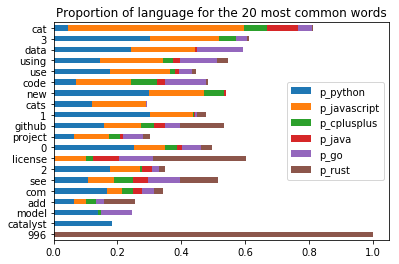

In [25]:
(word_counts
 .assign(p_python = word_counts.python / word_counts['all'],
         p_javascript = word_counts.javascript / word_counts['all'], 
         p_cplusplus = word_counts.cplusplus / word_counts['all'],
         p_java = word_counts.java / word_counts['all'], 
         p_go = word_counts.go / word_counts['all'], 
         p_rust = word_counts.rust / word_counts['all'])
 .sort_values(by='all')
 [['p_python', 'p_javascript', 'p_cplusplus', 'p_java', 'p_go', 'p_rust']]
 .tail(20)
 .sort_values('p_javascript')
 .plot.barh(stacked=True))

plt.title('Proportion of language for the 20 most common words')

# All words:

(-0.5, 799.5, 399.5, -0.5)

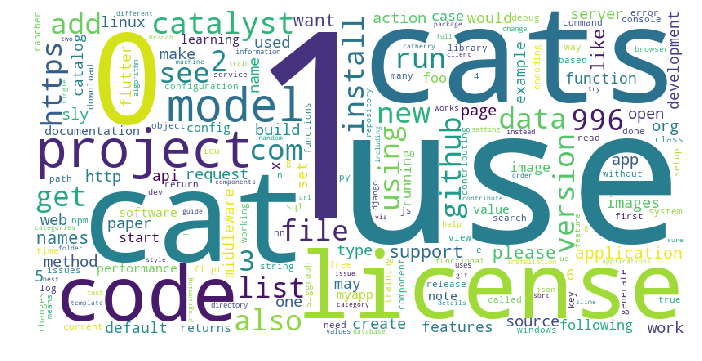

In [27]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(word_freq_for_all)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

# Create wordclouds for each language

## javascript

(-0.5, 799.5, 399.5, -0.5)

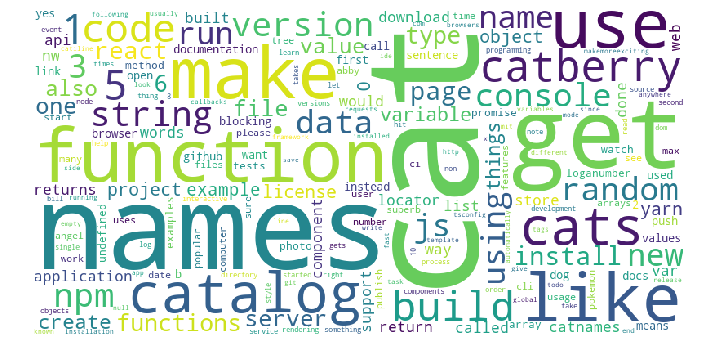

In [28]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(javascript_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## c++

(-0.5, 799.5, 399.5, -0.5)

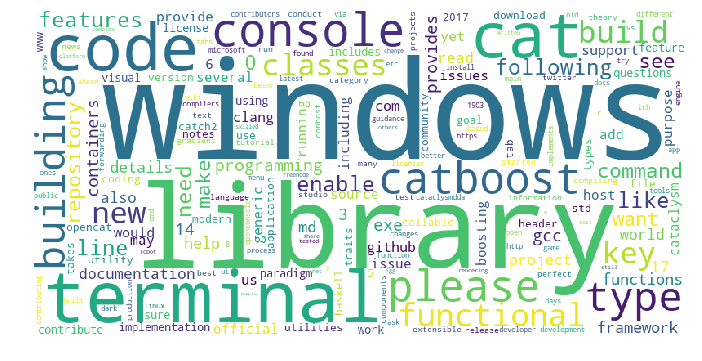

In [29]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(cplusplus_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## python 

(-0.5, 799.5, 399.5, -0.5)

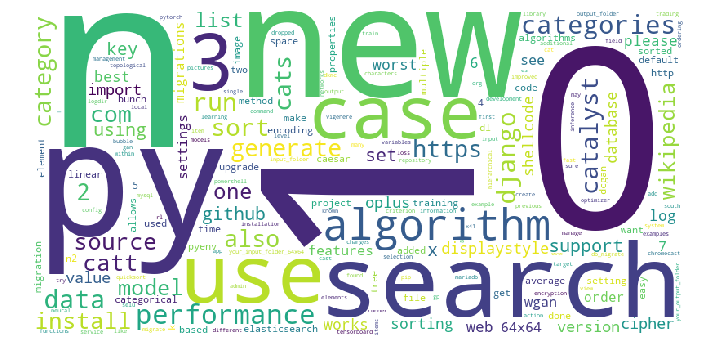

In [30]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(python_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## java

(-0.5, 799.5, 399.5, -0.5)

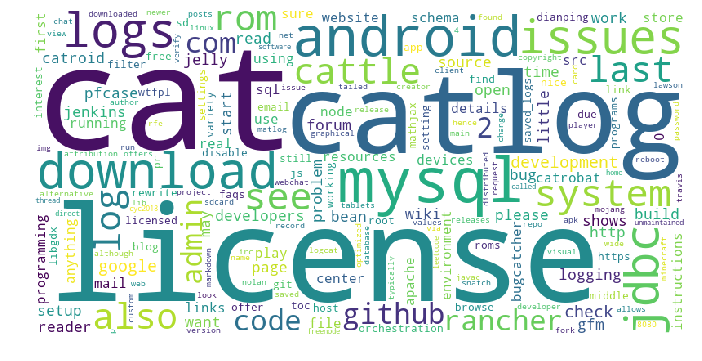

In [31]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(java_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## go

(-0.5, 799.5, 399.5, -0.5)

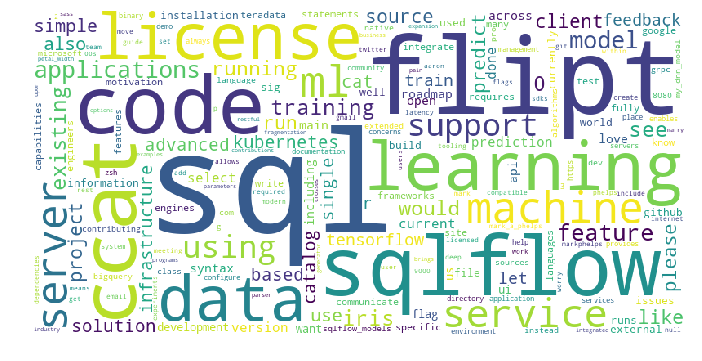

In [32]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(go_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## rust 

(-0.5, 799.5, 399.5, -0.5)

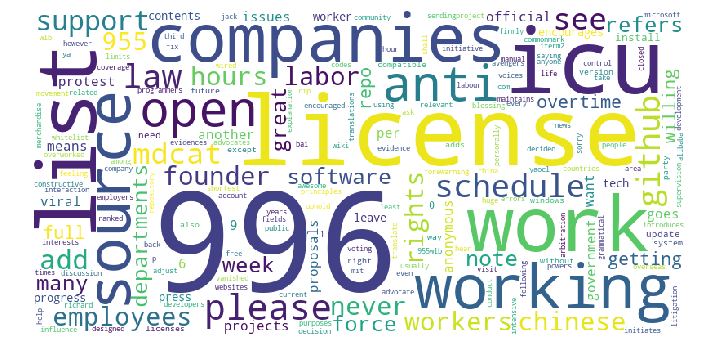

In [33]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(rust_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

In [34]:
afinn.score('This is utterly excellent!')

3.0